In [75]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2b772868-6042-4b02-8aa9-a05c8d578be1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-18T01:35:05.349Z', 'error_code': 0, 'error_message': None, 'elapsed': 579, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [76]:
import pandas as pd

In [77]:
pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\3352964231.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19349175.00000,19349175.00000,False,NaN,1,None,None,None,2023-04-18T01:33:00.000Z,29321.26516,16807280881.90597,18.24080,-0.37771,-2.20621,-1.84249,7.62926,23.40996,38.24646,567342290735.29688,45.49060,615746568287.33997,None,2023-04-18T01:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:35:08.726338
1,1027,Ethereum,ETH,ethereum,6734,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119434715.07548,119434715.07548,False,NaN,2,None,None,None,2023-04-18T01:33:00.000Z,2069.69154,9087548972.21273,6.62530,-0.32902,-1.18878,8.14728,15.65022,24.82871,31.59962,247193018801.62668,19.84530,247193018801.63000,None,2023-04-18T01:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:35:08.726338
2,825,Tether,USDT,tether,51376,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,None,None,None,2023-04-18T01:33:00.000Z,1.00046,30378194698.55709,14.41950,-0.00247,0.01659,-0.00951,-0.23350,0.02658,0.02500,80968700350.17039,6.49550,84130064250.96001,None,2023-04-18T01:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 01:35:08.726338
3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865487.09601,155865487.09601,False,NaN,4,None,None,None,2023-04-18T01:33:00.000Z,338.20464,812083571.15125,-16.62380,-0.57258,-2.24666,5.94012,0.54393,9.89027,12.60893,52714430348.23656,4.23200,52714430348.24000,None,2023-04-18T01:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:35:08.726338
4,3408,USD Coin,USDC,usd-coin,11841,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31641395082.68181,31641395082.68181,False,NaN,5,None,None,None,2023-04-18T01:33:00.000Z,0.99991,4122129528.00622,-2.65460,0.00239,0.03660,0.02494,-0.00392,-0.01586,-0.01049,31638603902.03326,2.54000,31638603902.03000,None,2023-04-18T01:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 01:35:08.726338
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-18T01:33:00.000Z,0.51159,933312584.53703,29.01850,-0.22388,-0.46564,-0.41397,35.38117,31.63846,32.38035,26474962877.42816,2.12550,51158547439.26000,None,2023-04-18T01:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:35:08.726338
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34777886368.69600,35694617077.12100,False,NaN,7,None,None,None,2023-04-18T01:33:00.000Z,0.43052,434425874.80541,10.69830,-0.64209,-3.03216,8.35842,25.36482,9.29949,24.02474,14972499984.33407,1.20110,19373302107.90000,None,2023-04-18T01:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:35:08.726338
7,74,Dogecoin,DOGE,dogecoin,687,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138982366383.70520,138982366383.70520,False,NaN,8,None,None,None,2023-04-18T01:33:00.000Z,0.09045,1332699774.42151,115.52470,-1.25065,1.46604,7.01948,21.33970,5.11175,6.69637,12571644655.42447,1.00850,12571644655.42000,None,2023-04-1

In [78]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2b772868-6042-4b02-8aa9-a05c8d578be1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    
    if not os.path.isfile(r'C:\Users\Wajeeh Abu Tabaq\Desktop\Crypto API collector\API2.csv'):
        df.to_csv(r'C:\Users\Wajeeh Abu Tabaq\Desktop\Crypto API collector\API2.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Wajeeh Abu Tabaq\Desktop\Crypto API collector\API2.csv', mode = 'a', header = False)
    
    

In [38]:
import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API run complete')
    sleep(30) # SLeep for 30s between runs
exit()
    
    
    
    
    
    

{'status': {'timestamp': '2023-04-18T00:57:56.509Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-04-18T00:58:26.783Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-04-18T00:58:57.356Z', 'error_code': 0, 'error_message': None, 'elapsed': 133, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-04-18T00:59:27.814Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-04-18T00:59:58.383Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-04-18T01:00:28.677Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9211}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Wajeeh Abu Tabaq\AppData\Local\Temp\ipykernel_26148\2953814975.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [93]:
df72 = pd.read_csv(r'C:\Users\Wajeeh Abu Tabaq\Desktop\Crypto API collector\API2.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349175.00000,19349175.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,29347.55838,16969689797.96064,23.29770,-0.33287,-1.80406,-1.59744,8.00581,23.46782,38.18560,567851043008.53198,45.46520,616298726078.97998,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
1,1,1027,Ethereum,ETH,ethereum,6734,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119434715.07548,119434715.07548,False,NaN,2,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,2072.45575,9186902512.97080,10.12890,-0.09528,-0.59472,8.11906,16.25552,25.33192,31.73331,247523161925.38263,19.82300,247523161925.38000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
2,2,825,Tether,USDT,tether,51376,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,1.00041,30909489111.71052,19.26580,-0.00458,-0.01640,-0.02233,-0.19003,0.02292,0.02286,80965131197.38156,6.48400,84126355743.20000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 00:49:04.847829
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865487.09601,155865487.09601,False,NaN,4,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,339.89551,826810607.35392,-13.46320,0.00134,-1.19228,6.74023,1.25642,10.94994,13.39686,52977979052.28667,4.24280,52977979052.29000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
4,4,3408,USD Coin,USDC,usd-coin,11841,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31641395082.68181,31641395082.68181,False,NaN,5,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,0.99986,4185576004.24847,0.93700,0.00961,0.01527,0.00566,0.02113,-0.03079,-0.01416,31636845549.99634,2.53360,31636845550.00000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 00:49:04.847829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,6636,Polkadot,DOT,polkadot-new,497,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1177113804.12353,1303592681.42871,False,NaN,11,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,6.66735,199795113.39555,3.33940,-0.40961,0.13956,5.65980,3.49681,3.71597,11.59920,7848232798.83810,0.62780,8691512072.05000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
116,11,2,Litecoin,LTC,litecoin,905,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72728351.82100,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,98.97594,631689155.78448,-23.32950,0.32643,0.87494,5.51460,17.36727,-1.04359,12.80399,7198356984.70288,0.57580,8313978958.35000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
117,12,5805,Avalanche,AVAX,avalanche,405,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",720000000.00000,326298244.85432,422360964.85432,False,NaN,13,NaN,NaN,NaN,2023-04-18T00

In [94]:
df72


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349175.00000,19349175.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,29347.55838,16969689797.96064,23.29770,-0.33287,-1.80406,-1.59744,8.00581,23.46782,38.18560,567851043008.53198,45.46520,616298726078.97998,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
1,1,1027,Ethereum,ETH,ethereum,6734,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119434715.07548,119434715.07548,False,NaN,2,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,2072.45575,9186902512.97080,10.12890,-0.09528,-0.59472,8.11906,16.25552,25.33192,31.73331,247523161925.38263,19.82300,247523161925.38000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
2,2,825,Tether,USDT,tether,51376,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,1.00041,30909489111.71052,19.26580,-0.00458,-0.01640,-0.02233,-0.19003,0.02292,0.02286,80965131197.38156,6.48400,84126355743.20000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 00:49:04.847829
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865487.09601,155865487.09601,False,NaN,4,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,339.89551,826810607.35392,-13.46320,0.00134,-1.19228,6.74023,1.25642,10.94994,13.39686,52977979052.28667,4.24280,52977979052.29000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
4,4,3408,USD Coin,USDC,usd-coin,11841,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31641395082.68181,31641395082.68181,False,NaN,5,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,0.99986,4185576004.24847,0.93700,0.00961,0.01527,0.00566,0.02113,-0.03079,-0.01416,31636845549.99634,2.53360,31636845550.00000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 00:49:04.847829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,6636,Polkadot,DOT,polkadot-new,497,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1177113804.12353,1303592681.42871,False,NaN,11,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,6.66735,199795113.39555,3.33940,-0.40961,0.13956,5.65980,3.49681,3.71597,11.59920,7848232798.83810,0.62780,8691512072.05000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
116,11,2,Litecoin,LTC,litecoin,905,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72728351.82100,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,98.97594,631689155.78448,-23.32950,0.32643,0.87494,5.51460,17.36727,-1.04359,12.80399,7198356984.70288,0.57580,8313978958.35000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
117,12,5805,Avalanche,AVAX,avalanche,405,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",720000000.00000,326298244.85432,422360964.85432,False,NaN,13,NaN,NaN,NaN,2023-04-18T00

In [95]:
#Making the numbers easier on the eyes

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [96]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349175.00000,19349175.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,29347.55838,16969689797.96064,23.29770,-0.33287,-1.80406,-1.59744,8.00581,23.46782,38.18560,567851043008.53198,45.46520,616298726078.97998,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
1,1,1027,Ethereum,ETH,ethereum,6734,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119434715.07548,119434715.07548,False,NaN,2,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,2072.45575,9186902512.97080,10.12890,-0.09528,-0.59472,8.11906,16.25552,25.33192,31.73331,247523161925.38263,19.82300,247523161925.38000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
2,2,825,Tether,USDT,tether,51376,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,1.00041,30909489111.71052,19.26580,-0.00458,-0.01640,-0.02233,-0.19003,0.02292,0.02286,80965131197.38156,6.48400,84126355743.20000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 00:49:04.847829
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865487.09601,155865487.09601,False,NaN,4,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,339.89551,826810607.35392,-13.46320,0.00134,-1.19228,6.74023,1.25642,10.94994,13.39686,52977979052.28667,4.24280,52977979052.29000,NaN,2023-04-18T00:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 00:49:04.847829
4,4,3408,USD Coin,USDC,usd-coin,11841,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31641395082.68181,31641395082.68181,False,NaN,5,NaN,NaN,NaN,2023-04-18T00:47:00.000Z,0.99986,4185576004.24847,0.93700,0.00961,0.01527,0.00566,0.02113,-0.03079,-0.01416,31636845549.99634,2.53360,31636845550.00000,NaN,2023-04-18T00:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 00:49:04.847829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,6636,Polkadot,DOT,polkadot-new,497,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1177113804.12353,1303592681.42871,False,NaN,11,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,6.66735,199795113.39555,3.33940,-0.40961,0.13956,5.65980,3.49681,3.71597,11.59920,7848232798.83810,0.62780,8691512072.05000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
116,11,2,Litecoin,LTC,litecoin,905,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72728351.82100,84000000.00000,False,NaN,12,NaN,NaN,NaN,2023-04-18T00:58:00.000Z,98.97594,631689155.78448,-23.32950,0.32643,0.87494,5.51460,17.36727,-1.04359,12.80399,7198356984.70288,0.57580,8313978958.35000,NaN,2023-04-18T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 01:00:27.066325
117,12,5805,Avalanche,AVAX,avalanche,405,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",720000000.00000,326298244.85432,422360964.85432,False,NaN,13,NaN,NaN,NaN,2023-04-18T00

In [97]:

df3 = df72.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3





,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20693,-1.67435,-1.59364,8.19933,23.76200,38.35958
Ethereum,-0.02838,-0.42122,8.23434,16.57748,25.50672,31.94417
Tether,-0.01484,-0.02110,-0.02285,-0.20658,0.01516,0.01469
BNB,-0.02283,-1.05160,6.68829,1.31361,10.95538,13.43087
USD Coin,-0.00385,0.01561,0.00088,0.01068,-0.02105,-0.01540
XRP,0.22452,-0.09862,-0.71347,35.67012,32.10076,32.13920
Cardano,-0.37077,-2.26060,8.45521,26.38385,10.29398,24.80210
Dogecoin,-0.27373,2.69941,7.47561,22.60600,6.31072,9.37171
Polygon,-0.10002,-0.76015,2.74996,-3.38373,-18.94434,15.26491


In [98]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.20693
             quote.USD.percent_change_24h   -1.67435
             quote.USD.percent_change_7d    -1.59364
             quote.USD.percent_change_30d    8.19933
             quote.USD.percent_change_60d   23.76200
                                              ...   
Binance USD  quote.USD.percent_change_24h   -0.01612
             quote.USD.percent_change_7d    -0.03750
             quote.USD.percent_change_30d   -0.00563
             quote.USD.percent_change_60d   -0.02058
             quote.USD.percent_change_90d   -0.01158
Length: 90, dtype: float64

In [46]:
type(df4) # its a series .... facepalm man :p

pandas.core.series.Series

In [99]:
df5 = df4.to_frame(name= 'values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.20693
            quote.USD.percent_change_24h -1.67435
            quote.USD.percent_change_7d  -1.59364
            quote.USD.percent_change_30d  8.19933
            quote.USD.percent_change_60d 23.76200
...                                           ...
Binance USD quote.USD.percent_change_24h -0.01612
            quote.USD.percent_change_7d  -0.03750
            quote.USD.percent_change_30d -0.00563
            quote.USD.percent_change_60d -0.02058
            quote.USD.percent_change_90d -0.01158

[90 rows x 1 columns]

In [100]:
df5.count()

values    90
dtype: int64

In [101]:
index = pd.Index(range(90))
#df6 = df5.set_index(index) #set and rest, it refixes itself
df6 = df5.reset_index() 
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,quote.USD.percent_change_7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,quote.USD.percent_change_7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [106]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,quote.USD.percent_change_7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,quote.USD.percent_change_7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

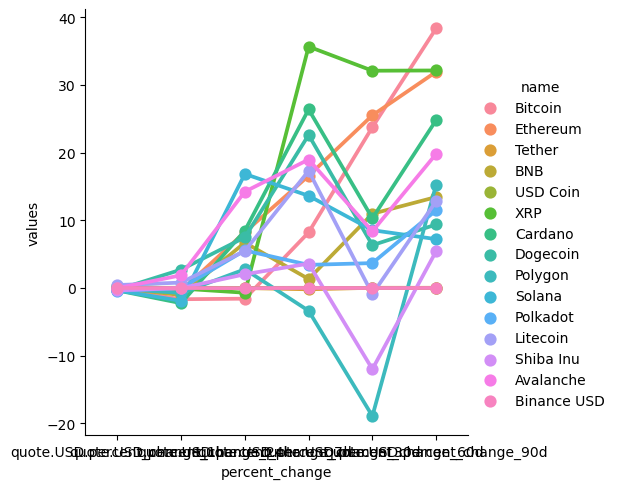

In [87]:
sns.catplot(x='percent_change', y='values', hue = 'name', data= df7, kind = 'point')

In [108]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,quote.USD.percent_change_7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,quote.USD.percent_change_7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [89]:
df7 

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,quote.USD.percent_change_7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,quote.USD.percent_change_7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [109]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [110]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,7d,-1.59364
3,Bitcoin,quote.USD.percent_change_30d,8.19933
4,Bitcoin,quote.USD.percent_change_60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,7d,-0.03750
87,Binance USD,quote.USD.percent_change_30d,-0.00563
88,Binance USD,quote.USD.percent_change_60d,-0.02058


In [111]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])

In [112]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,7d,-1.59364
3,Bitcoin,30d,8.19933
4,Bitcoin,60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,7d,-0.03750
87,Binance USD,30d,-0.00563
88,Binance USD,60d,-0.02058


In [113]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])

In [114]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,quote.USD.percent_change_24h,-1.67435
2,Bitcoin,7d,-1.59364
3,Bitcoin,30d,8.19933
4,Bitcoin,60d,23.76200
...,...,...,...
85,Binance USD,quote.USD.percent_change_24h,-0.01612
86,Binance USD,7d,-0.03750
87,Binance USD,30d,-0.00563
88,Binance USD,60d,-0.02058


In [115]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20693
1,Bitcoin,24h,-1.67435
2,Bitcoin,7d,-1.59364
3,Bitcoin,30d,8.19933
4,Bitcoin,60d,23.76200
...,...,...,...
85,Binance USD,24h,-0.01612
86,Binance USD,7d,-0.03750
87,Binance USD,30d,-0.00563
88,Binance USD,60d,-0.02058


In [ ]:
#I could've done it in one replace using double series but yea :/

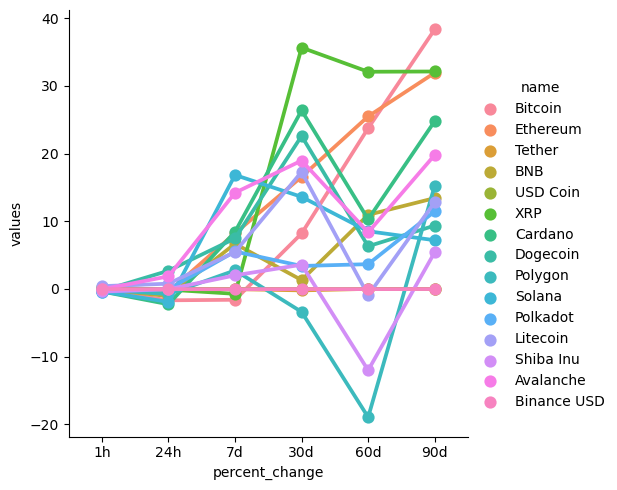

In [116]:
sns.catplot(x='percent_change', y='values', hue = 'name', data= df7, kind = 'point')

In [121]:
df8 = df72[['name','quote.USD.price','timestamp']]

In [122]:
df8

,name,quote.USD.price,timestamp
0,Bitcoin,29347.55838,2023-04-18 00:49:04.847829
1,Ethereum,2072.45575,2023-04-18 00:49:04.847829
2,Tether,1.00041,2023-04-18 00:49:04.847829
3,BNB,339.89551,2023-04-18 00:49:04.847829
4,USD Coin,0.99986,2023-04-18 00:49:04.847829
...,...,...,...
115,Polkadot,6.66735,2023-04-18 01:00:27.066325
116,Litecoin,98.97594,2023-04-18 01:00:27.066325
117,Avalanche,20.53734,2023-04-18 01:00:27.066325
118,Shiba Inu,0.00001,2023-04-18 01:00:27.066325


In [123]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,29347.55838,2023-04-18 00:49:04.847829
15,Bitcoin,29347.55838,2023-04-18 00:49:04.847829
30,Bitcoin,29378.26174,2023-04-18 00:57:54.909107
45,Bitcoin,29378.26174,2023-04-18 00:58:25.180287
60,Bitcoin,29378.48015,2023-04-18 00:58:55.748229
75,Bitcoin,29378.48015,2023-04-18 00:59:26.247936
90,Bitcoin,29374.15034,2023-04-18 00:59:56.791399
105,Bitcoin,29374.15034,2023-04-18 01:00:27.066325


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

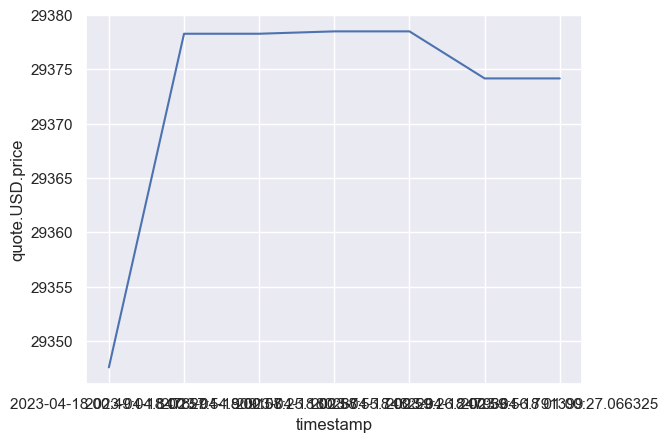

In [126]:
sns.set_theme(style='darkgrid')

sns.lineplot(x= 'timestamp', y='quote.USD.price', data = df9)